# <span style="background-color: #F1F0F0; padding: 5px;">Importing Libraries</span>

In [1]:
# Data Handling and Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# Model Selection and Training
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/playground-series-s3e22'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e22/sample_submission.csv
/kaggle/input/playground-series-s3e22/train.csv
/kaggle/input/playground-series-s3e22/test.csv


### Dataset Composition
**Training Dataset (train.csv)**
* Rows: Each row represents a horse with various attributes recorded
* Columns: It contains 29 columns, including an identifier (id), 27 feature columns (like surgery, age, rectal_temp, etc.), and a target column (outcome) representing the horse's fate (e.g., 'lived', 'died', 'euthanized').
* Target Variable: outcome

**Test Dataset (test.csv)**
* Rows: Each row represents a horse to be predicted with various attributes recorded.
* Columns: It contains 28 columns, including an identifier (id) and 27 feature columns (similar to the training dataset but without the outcome column).

**Sample Submission (sample_submission.csv)**
* Rows: Each row corresponds to a horse in the test set.
* Columns: It contains 2 columns - id (referring to the horse's ID in the test dataset) and outcome (where you will place your predictions).

# <span style="background-color: #F1F0F0; padding: 5px;">Data Loading</span>

In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s3e22/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s3e22/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e22/sample_submission.csv')

In [4]:
print(train_data.head())
print(test_data.head())
print(sample_submission.head())

   id surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0   0     yes  adult           530001         38.1  132.0              24.0   
1   1     yes  adult           533836         37.5   88.0              12.0   
2   2     yes  adult           529812         38.3  120.0              28.0   
3   3     yes  adult          5262541         37.1   72.0              30.0   
4   4      no  adult          5299629         38.0   52.0              48.0   

  temp_of_extremities peripheral_pulse mucous_membrane  ...  \
0                cool          reduced   dark_cyanotic  ...   
1                cool           normal   pale_cyanotic  ...   
2                cool          reduced       pale_pink  ...   
3                cold          reduced       pale_pink  ...   
4              normal           normal     normal_pink  ...   

  packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0               57.0           8.5     serosanguious            3.4   
1   

In [5]:
# Check for missing values in the training dataset
missing_values_train = train_data.isnull().sum()
print(missing_values_train)

# Check for missing values in the test dataset
missing_values_test = test_data.isnull().sum()
print(missing_values_test)

# Explore the distribution of the target variable in the training dataset
outcome_distribution = train_data['outcome'].value_counts()
print(outcome_distribution)

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64
id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
p

# <span style="background-color: #F1F0F0; padding: 5px;">Exploratory Data Analysis</span>

### Descriptive Statistics

In [6]:
# Descriptive statistics for numerical features in the training dataset
train_descriptive_stats = train_data.describe()
print(train_descriptive_stats)

# Descriptive statistics for numerical features in the test dataset
test_descriptive_stats = test_data.describe()
print(test_descriptive_stats)

              id  hospital_number  rectal_temp        pulse  respiratory_rate  \
count  1235.0000     1.235000e+03  1235.000000  1235.000000       1235.000000   
mean    617.0000     9.545004e+05    38.202186    79.574089         30.054251   
std     356.6581     1.356403e+06     0.788668    29.108638         16.452066   
min       0.0000     5.213990e+05    35.400000    30.000000          8.000000   
25%     308.5000     5.288000e+05    37.800000    53.000000         18.000000   
50%     617.0000     5.297770e+05    38.200000    76.000000         28.000000   
75%     925.5000     5.341450e+05    38.600000   100.000000         36.000000   
max    1234.0000     5.305129e+06    40.800000   184.000000         96.000000   

       nasogastric_reflux_ph  packed_cell_volume  total_protein  \
count            1235.000000         1235.000000    1235.000000   
mean                4.382591           49.602429      21.388016   
std                 1.937357           10.535800      26.676453   
mi

### Visualization

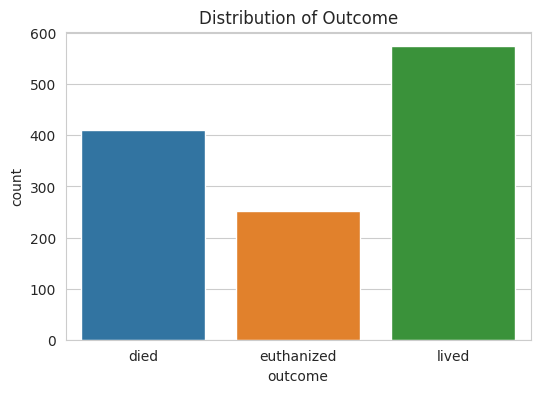

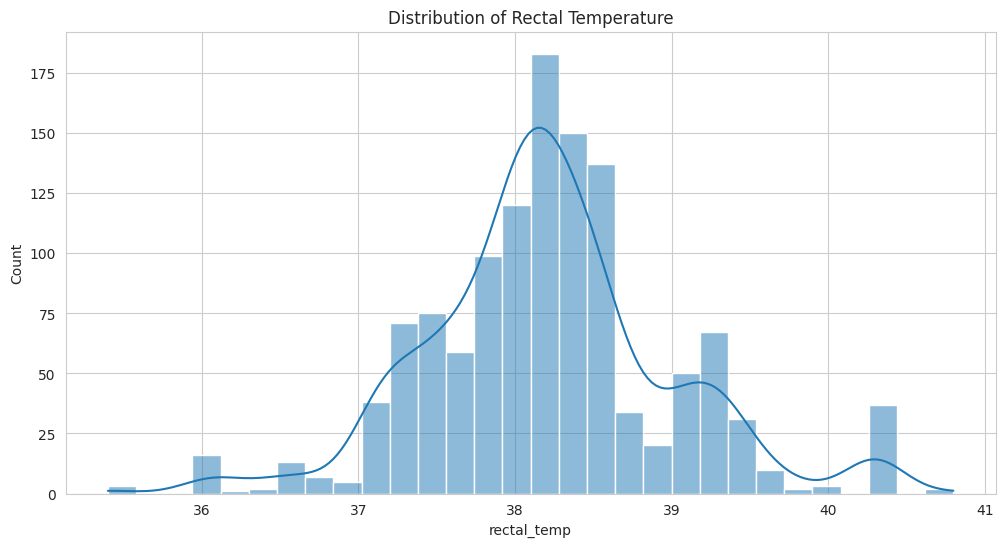

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


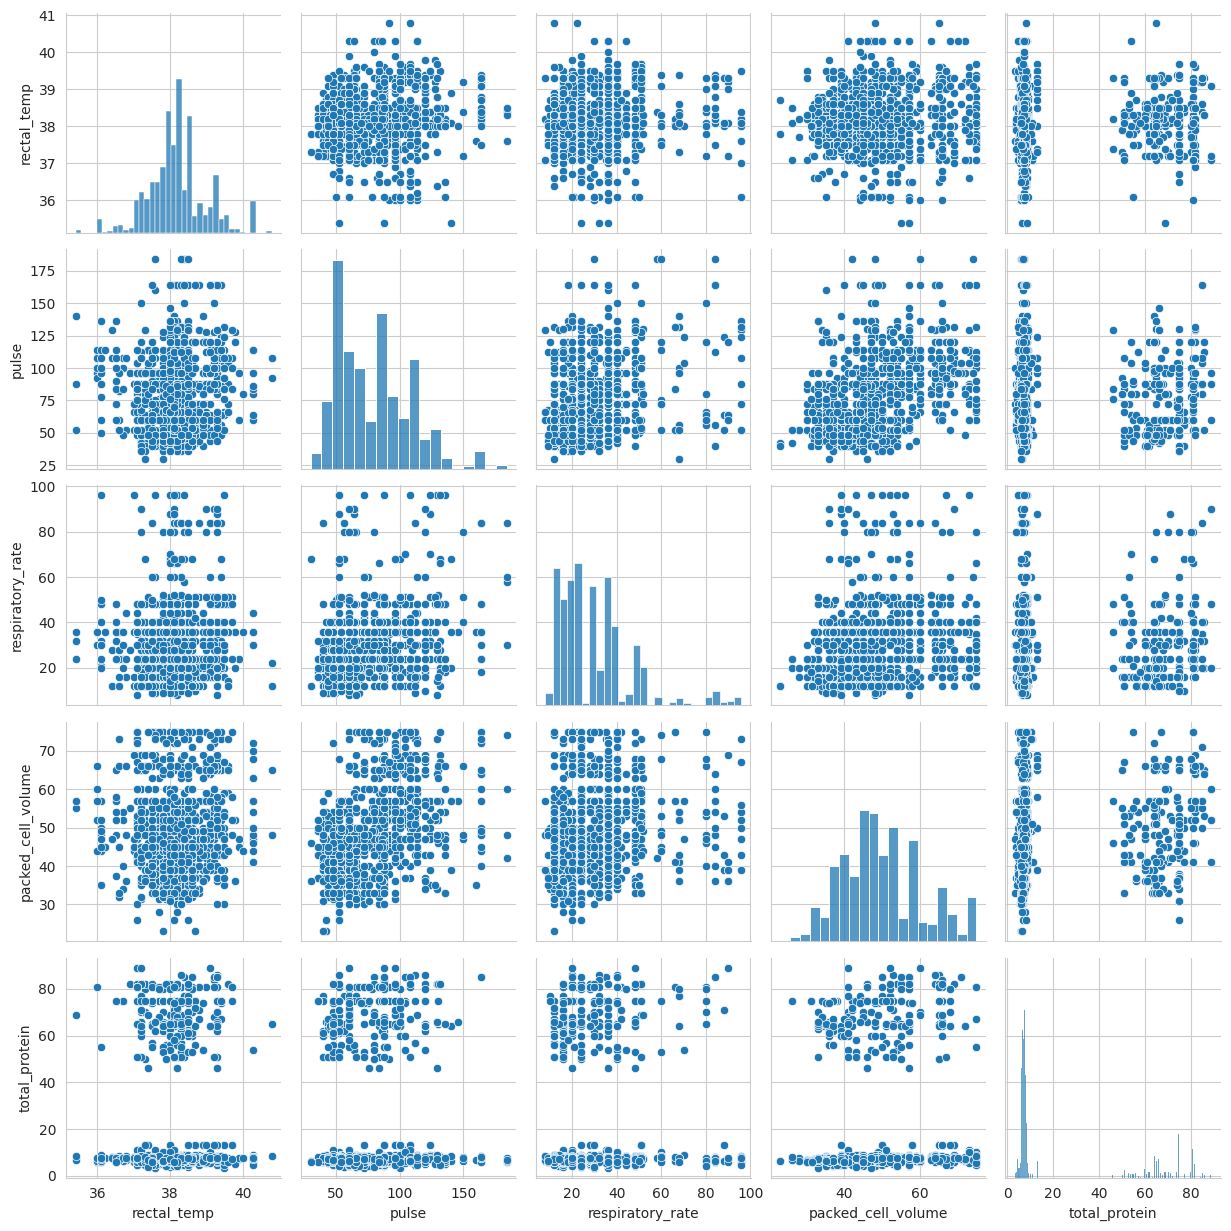

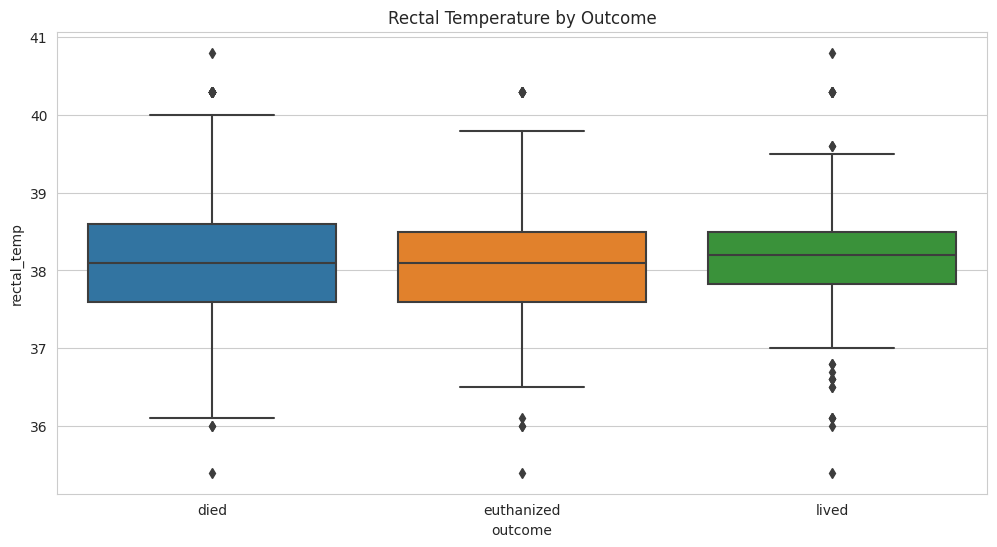

In [7]:
# Setting
blue_gradient = sns.color_palette("ch:s=.25,rot=-.25", n_colors=10)
sns.set_style('whitegrid')

# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(data=train_data, x='outcome')
plt.title('Distribution of Outcome')
plt.show()

# Plot the distributions of some numerical features
plt.figure(figsize=(12,6))
sns.histplot(train_data['rectal_temp'].dropna(), kde=True, bins=30)
plt.title('Distribution of Rectal Temperature')
plt.show()

# Pair plot of a subset of numerical variables to visualize pairwise relationships
subset_columns = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']
sns.pairplot(train_data[subset_columns].dropna())
plt.show()

# Box plots to visualize the distribution of numerical variables across different outcome categories
plt.figure(figsize=(12,6))
sns.boxplot(x='outcome', y='rectal_temp', data=train_data)
plt.title('Rectal Temperature by Outcome')
plt.show()

### Correlation Analysis

                             id  hospital_number  rectal_temp     pulse  \
id                     1.000000        -0.011094     0.010050 -0.011398   
hospital_number       -0.011094         1.000000    -0.002552  0.118391   
rectal_temp            0.010050        -0.002552     1.000000  0.176761   
pulse                 -0.011398         0.118391     0.176761  1.000000   
respiratory_rate       0.010348         0.085008     0.124377  0.395130   
nasogastric_reflux_ph -0.031379         0.114354     0.115980 -0.010132   
packed_cell_volume    -0.019742        -0.018028     0.088986  0.435102   
total_protein          0.020479        -0.154746    -0.060842  0.004373   
abdomo_protein         0.022273         0.141800     0.043342  0.056391   
lesion_1               0.080642         0.030844     0.021711  0.000037   
lesion_2              -0.065084         0.022098    -0.022823  0.021804   
lesion_3              -0.026604        -0.012575    -0.005220  0.028273   
outcome                0.

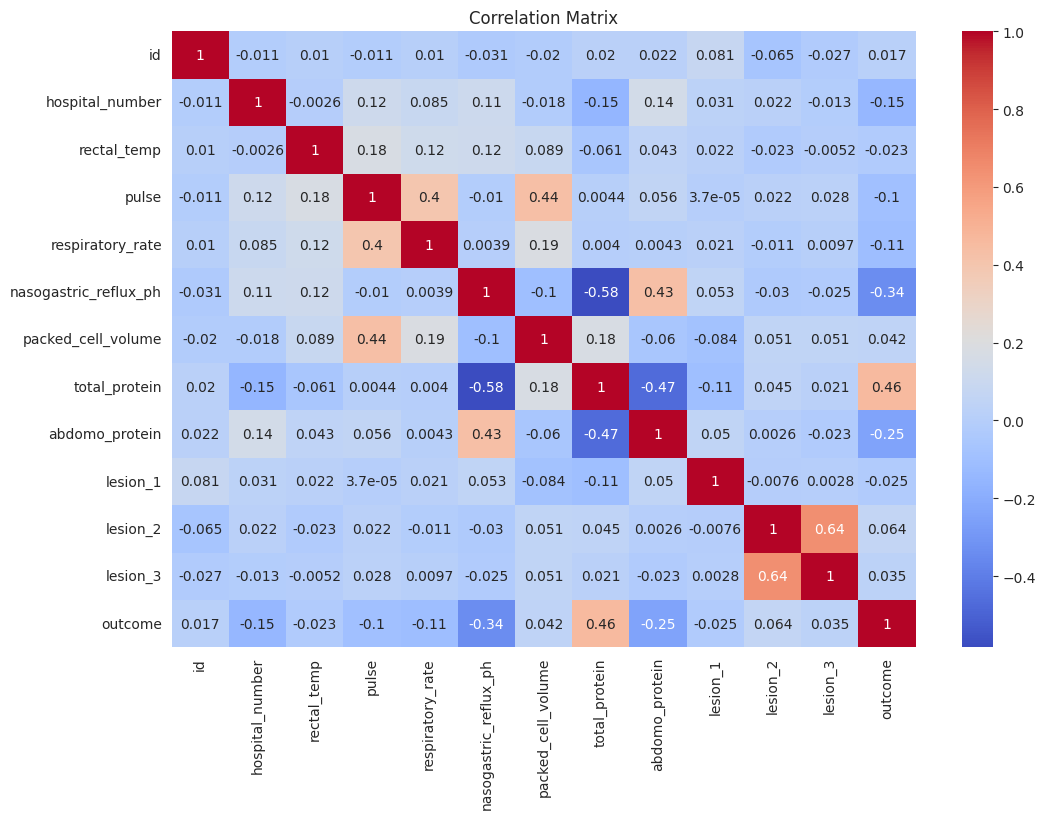

In [8]:
# Encoding the target variable
outcome_mapping = {'lived': 1, 'died': 0, 'euthanized': 2}
train_data_encoded = train_data.copy()
train_data_encoded['outcome'] = train_data_encoded['outcome'].replace(outcome_mapping)

# Select only the numerical columns
numerical_cols = train_data_encoded.select_dtypes(include=[np.number]).columns

# Correlation matrix
correlation_matrix = train_data_encoded[numerical_cols].corr()
print(correlation_matrix)

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Insights from EDA
**Distribution of Outcome**
* It seems like there is a class imbalance with more instances of “lived” compared to other outcomes. This is important to keep in mind as it might affect the performance of the machine learning model. We might need to address this imbalance during modeling.

**Distribution of Rectal Temperature**

* The distribution of rectal temperatures appears to be approximately normally distributed, albeit with a slight skew. This feature might be an important one, as body temperature can often be a crucial health indicator.

**Pair Plot**
* In the pair plot, we can observe scatter plots of various pairs of features. It seems there are some positive correlations between pairs such as “pulse” and “packed_cell_volume”, “pulse” and “respiratory_rate”. We might consider creating interaction terms between these features.

**Boxplot of Rectal Temperature by Outcome**
* The box plot shows that the median rectal temperature seems to be slightly lower for horses that died compared to those that lived. This might indicate that lower rectal temperatures are associated with negative outcomes, and we might consider using this feature in our model.

# <span style="background-color: #F1F0F0; padding: 5px;">Data Preprocessing</span>

### Handling Missing Values


In [9]:
# Define numerical and categorical columns
numerical_cols = ['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph',
                  'packed_cell_volume', 'total_protein', 'abdomo_protein',
                  'lesion_1', 'lesion_2', 'lesion_3', 'hospital_number']
categorical_cols = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
                    'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
                    'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
                    'rectal_exam_feces', 'abdomen', 'abdomo_appearance',
                    'surgical_lesion', 'cp_data']

# Numerical imputer: replace missing values with the median of the column
numerical_imputer = SimpleImputer(strategy='median')
train_data[numerical_cols] = numerical_imputer.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = numerical_imputer.transform(test_data[numerical_cols])

# Categorical imputer: replace missing values with the most frequent value of the column
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = categorical_imputer.fit_transform(train_data[categorical_cols])
test_data[categorical_cols] = categorical_imputer.transform(test_data[categorical_cols])

### Encoding Categorical Variables


In [10]:
# One-hot encode categorical variables
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

# Align the columns in the test data with those in the training data
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

# Drop the ‘outcome’ column from the test dataset (it was added during the reindexing above)
test_data_encoded = test_data_encoded.drop(columns=['outcome'])

In [11]:
train_data_encoded.head()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,...,rectal_exam_feces_normal,rectal_exam_feces_serosanguious,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
0,0,530001.0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209.0,...,False,False,True,False,False,False,False,True,True,False
1,1,533836.0,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208.0,...,False,False,True,False,False,False,False,True,True,False
2,2,529812.0,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124.0,...,False,False,False,False,False,False,False,True,True,False
3,3,5262541.0,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208.0,...,False,False,True,False,False,False,True,False,True,True
4,4,5299629.0,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0.0,...,True,False,False,False,True,False,True,False,False,True


In [12]:
test_data_encoded.head()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,...,rectal_exam_feces_normal,rectal_exam_feces_serosanguious,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
0,1235,534053.0,38.6,40.0,20.0,7.0,42.0,7.5,2.3,0.0,...,True,0,True,False,False,False,False,False,False,False
1,1236,528469.0,38.2,112.0,48.0,3.5,44.0,6.0,2.6,2208.0,...,False,0,True,False,False,False,False,True,False,True
2,1237,528178.0,37.7,66.0,12.0,3.0,31.5,6.0,1.6,2205.0,...,True,0,True,False,False,False,True,False,True,True
3,1238,534784.0,37.1,88.0,20.0,2.0,75.0,81.0,1.0,1400.0,...,False,0,False,False,False,False,False,True,True,False
4,1239,529840.0,38.3,50.0,12.0,3.0,37.0,6.8,2.6,2208.0,...,False,0,True,False,False,False,True,False,True,True


In [13]:
train_data_encoded.isnull().sum()

id                                  0
hospital_number                     0
rectal_temp                         0
pulse                               0
respiratory_rate                    0
nasogastric_reflux_ph               0
packed_cell_volume                  0
total_protein                       0
abdomo_protein                      0
lesion_1                            0
lesion_2                            0
lesion_3                            0
outcome                             0
surgery_yes                         0
age_young                           0
temp_of_extremities_cool            0
temp_of_extremities_normal          0
temp_of_extremities_warm            0
peripheral_pulse_increased          0
peripheral_pulse_normal             0
peripheral_pulse_reduced            0
mucous_membrane_bright_red          0
mucous_membrane_dark_cyanotic       0
mucous_membrane_normal_pink         0
mucous_membrane_pale_cyanotic       0
mucous_membrane_pale_pink           0
capillary_re

In [14]:
test_data_encoded.isnull().sum()

id                                  0
hospital_number                     0
rectal_temp                         0
pulse                               0
respiratory_rate                    0
nasogastric_reflux_ph               0
packed_cell_volume                  0
total_protein                       0
abdomo_protein                      0
lesion_1                            0
lesion_2                            0
lesion_3                            0
surgery_yes                         0
age_young                           0
temp_of_extremities_cool            0
temp_of_extremities_normal          0
temp_of_extremities_warm            0
peripheral_pulse_increased          0
peripheral_pulse_normal             0
peripheral_pulse_reduced            0
mucous_membrane_bright_red          0
mucous_membrane_dark_cyanotic       0
mucous_membrane_normal_pink         0
mucous_membrane_pale_cyanotic       0
mucous_membrane_pale_pink           0
capillary_refill_time_less_3_sec    0
capillary_re

### Target Variable Encoding

In [15]:
outcome_mapping = {'lived': 1, 'died': 0, 'euthanized': 2}
train_data['outcome'] = train_data['outcome'].replace(outcome_mapping)

# <span style="background-color: #F1F0F0; padding: 5px;">Feature Engineering</span>

In [16]:
# Creating interaction terms
train_data['pulse_respiratory_interaction'] = train_data['pulse'] * train_data['respiratory_rate']
test_data['pulse_respiratory_interaction'] = test_data['pulse'] * test_data['respiratory_rate']

# Binning the ‘rectal_temp’ feature to create categories of temperature ranges
train_data['rectal_temp_binned'] = pd.cut(train_data['rectal_temp'], bins=[35, 37, 39, 41], labels=['Low', 'Normal', 'High'])
test_data['rectal_temp_binned'] = pd.cut(test_data['rectal_temp'], bins=[35, 37, 39, 41], labels=['Low', 'Normal', 'High'])

# Add ‘rectal_temp_binned’ to the list of categorical columns
categorical_cols += ['rectal_temp_binned']

# One-hot encode categorical variables
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

# Align the columns in the test data with those in the training data
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

# Drop the ‘outcome’ column from the test dataset (it was added during the reindexing above)
test_data_encoded = test_data_encoded.drop(columns=['outcome'])

# Creating polynomial features
train_data['pulse_squared'] = train_data['pulse'] ** 2
test_data['pulse_squared'] = test_data['pulse'] ** 2

### Data Splitting and Unsampling

In [17]:
# Identify the minority and majority classes
outcome_counts = train_data['outcome'].value_counts()
majority_class = outcome_counts.idxmax()
minority_classes = outcome_counts.index[outcome_counts.index != majority_class]

# Upsampling the minority classes to match the majority class
X_upsampled = train_data_encoded.drop(columns=['outcome'])
y_upsampled = train_data['outcome']
for minority_class in minority_classes:
    X_minority = X_upsampled[y_upsampled == minority_class]
    y_minority = y_upsampled[y_upsampled == minority_class]
    X_minority_upsampled, y_minority_upsampled = resample(X_minority, y_minority,
                                                         replace=True,
                                                         n_samples=outcome_counts[majority_class],
                                                         random_state=42)
    X_upsampled = pd.concat([X_upsampled, X_minority_upsampled])
    y_upsampled = pd.concat([y_upsampled, y_minority_upsampled])

# <span style="background-color: #F1F0F0; padding: 5px;">Model Selection and Training</span>

In [18]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# <span style="background-color: #F1F0F0; padding: 5px;">Model Evaluation</span>

In [19]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model using F1 score
f1 = f1_score(y_val, y_val_pred, average='micro')
print('Validation F1 Score:', f1)

Validation F1 Score: 0.8951781970649895


# <span style="background-color: #F1F0F0; padding: 5px;">Model Testing</span>

In [20]:
# Make predictions on the test dataset
test_predictions = model.predict(test_data_encoded)

# <span style="background-color: #F1F0F0; padding: 5px;">Submission</span>

In [21]:
# Map the encoded labels back to the original string labels
outcome_mapping_reverse = {1: 'lived', 0: 'died', 2: 'euthanized'}

# Apply the mapping to the predictions to get the original labels
test_predictions_labels = np.vectorize(outcome_mapping_reverse.get)(test_predictions)

# Create a submission file with the original labels
submission = sample_submission.copy()
submission['outcome'] = test_predictions_labels

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Display the first few rows of the submission file
print(submission.head(20))

      id     outcome
0   1235       lived
1   1236        died
2   1237       lived
3   1238  euthanized
4   1239       lived
5   1240        died
6   1241        died
7   1242        died
8   1243       lived
9   1244       lived
10  1245        died
11  1246       lived
12  1247  euthanized
13  1248        died
14  1249        died
15  1250        died
16  1251       lived
17  1252        died
18  1253        died
19  1254        died
